# ATDA 5340 - Final - Part  - ML Supervised - Denis Shilkin
car_evaluation.csv
<br> K-Means

In [153]:
# import libraries 
import pandas as pd
import numpy as np
from pandas import Series

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.metrics import classification_report

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Diagnostic: libraries loaded")

Diagnostic: libraries loaded


In [154]:
#load dataset
filename = "car_evaluation.csv"
df = pd.read_csv(filename, index_col=False, names=['Price','Maintenance','Doors','Passengers','Luggage','Safety','Evaluation'])

print(df.shape)

(1728, 7)


In [155]:
#check and clean
print(df.head(5))

   Price Maintenance Doors Passengers Luggage Safety Evaluation
0  vhigh       vhigh     2          2   small    low      unacc
1  vhigh       vhigh     2          2   small    med      unacc
2  vhigh       vhigh     2          2   small   high      unacc
3  vhigh       vhigh     2          2     med    low      unacc
4  vhigh       vhigh     2          2     med    med      unacc


In [156]:
print(df.dtypes)

Price          object
Maintenance    object
Doors          object
Passengers     object
Luggage        object
Safety         object
Evaluation     object
dtype: object


In [157]:
# Need to replace non-numeric values into numeric
df[['Doors']]=df[['Doors']].replace("5more",5)
df[['Passengers']]=df[['Passengers']].replace("more",5)

df["Doors"] = pd.to_numeric(df["Doors"])
df["Passengers"] = pd.to_numeric(df["Passengers"])

In [158]:
#changing non numeric values into numerinc
Price = Series([0,1,2,3],index=['low','med','high','vhigh'])    
df['Price']=df.Price.map(Price)

Maintenance = Series([0,1,2,3],index=['low','med','high','vhigh'])    
df['Maintenance']=df.Maintenance.map(Maintenance)

Luggage = Series([0,1,2],index=['small','med','big'])    
df['Luggage']=df.Luggage.map(Luggage)

Safety = Series([0,1,2],index=['low','med','high'])    
df['Safety']=df.Safety.map(Safety)

print(df.head(5))
print(df.dtypes)

   Price  Maintenance  Doors  Passengers  Luggage  Safety Evaluation
0      3            3      2           2        0       0      unacc
1      3            3      2           2        0       1      unacc
2      3            3      2           2        0       2      unacc
3      3            3      2           2        1       0      unacc
4      3            3      2           2        1       1      unacc
Price           int64
Maintenance     int64
Doors           int64
Passengers      int64
Luggage         int64
Safety          int64
Evaluation     object
dtype: object


In [163]:
#EDA
print(df.describe())

             Price  Maintenance        Doors   Passengers      Luggage  \
count  1728.000000  1728.000000  1728.000000  1728.000000  1728.000000   
mean      1.500000     1.500000     3.500000     3.666667     1.000000   
std       1.118358     1.118358     1.118358     1.247580     0.816733   
min       0.000000     0.000000     2.000000     2.000000     0.000000   
25%       0.750000     0.750000     2.750000     2.000000     0.000000   
50%       1.500000     1.500000     3.500000     4.000000     1.000000   
75%       2.250000     2.250000     4.250000     5.000000     2.000000   
max       3.000000     3.000000     5.000000     5.000000     2.000000   

            Safety  
count  1728.000000  
mean      1.000000  
std       0.816733  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       2.000000  
max       2.000000  


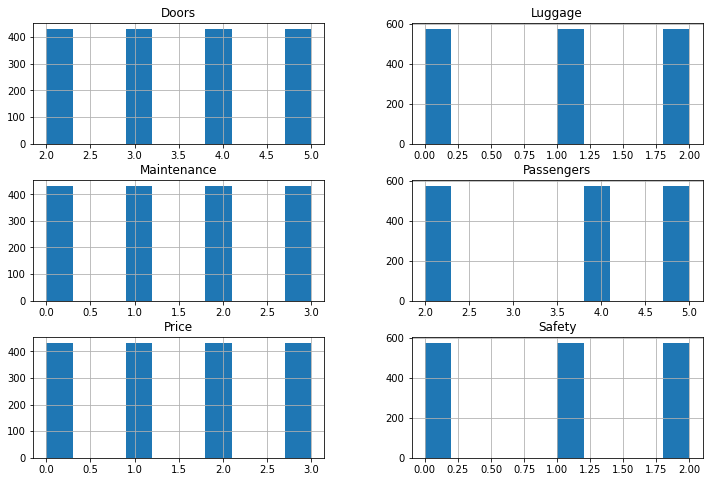

In [164]:
df.hist(figsize=(12, 8))
pyplot.show()

In [ ]:
array = df.values

X = array [:,0:6]
Y = array [:,6]

model = KMeans(n_clusters=10)
model.fit(X)

In [160]:
centroids = model.cluster_centers_
print(centroids)

[[0.44444444 2.55555556 4.33333333 4.5        1.         1.        ]
 [0.63636364 0.36363636 4.27272727 4.5        1.         1.        ]
 [2.2        2.6        2.5        4.5        1.         1.        ]
 [2.6        1.46666667 2.53333333 2.         1.         1.        ]
 [2.5        2.2        4.6        4.5        1.         1.        ]
 [0.45454545 1.36363636 2.36363636 4.5        1.         1.        ]
 [1.625      2.5625     4.4375     2.         1.         1.        ]
 [1.5        0.375      4.375      2.         1.         1.        ]
 [2.53846154 0.46153846 3.15384615 4.5        1.         1.        ]
 [0.41176471 1.58823529 2.64705882 2.         1.         1.        ]]


In [161]:
cluster_labels = model.labels_[::4]
print(cluster_labels)

[3 3 3 2 2 2 2 3 3 2 2 2 2 2 6 6 4 4 4 4 4 6 6 4 4 4 4 3 3 3 2 2 2 2 3 3 2
 2 2 2 2 6 6 4 4 4 4 4 6 6 4 4 4 4 3 3 3 8 8 8 8 3 3 8 8 8 8 8 3 3 8 8 8 8
 8 7 7 4 4 4 4 3 3 3 8 8 8 8 3 3 8 8 8 8 8 7 7 8 8 8 8 8 7 7 8 8 8 8 3 3 3
 2 2 2 2 6 6 2 2 2 2 2 6 6 4 4 4 4 4 6 6 4 4 4 4 3 3 3 2 2 2 2 3 3 2 2 2 2
 2 6 6 4 4 4 4 4 6 6 4 4 4 4 3 3 3 8 8 8 8 3 3 8 8 8 8 8 7 7 8 8 8 8 8 7 7
 4 4 4 4 3 3 3 8 8 8 8 7 7 8 8 8 8 8 7 7 8 8 8 8 8 7 7 1 1 1 1 9 9 9 2 2 2
 2 9 9 2 2 2 2 2 6 6 0 0 0 0 0 6 6 0 0 0 0 9 9 9 5 5 5 5 9 9 5 5 5 5 5 6 6
 0 0 0 0 0 6 6 0 0 0 0 9 9 9 5 5 5 5 9 9 5 5 5 5 5 7 7 1 1 1 1 1 7 7 1 1 1
 1 9 9 9 5 5 5 5 7 7 1 1 1 1 1 7 7 1 1 1 1 1 7 7 1 1 1 1 9 9 9 5 5 5 5 9 9
 0 0 0 0 0 6 6 0 0 0 0 0 6 6 0 0 0 0 9 9 9 5 5 5 5 9 9 5 5 5 5 5 9 9 0 0 0
 0 0 6 6 0 0 0 0 9 9 9 5 5 5 5 9 9 5 5 5 5 5 9 9 1 1 1 1 1 7 7 1 1 1 1 9 9
 9 5 5 5 5 9 9 1 1 1 1 1 7 7 1 1 1 1 1 7 7 1 1 1 1]


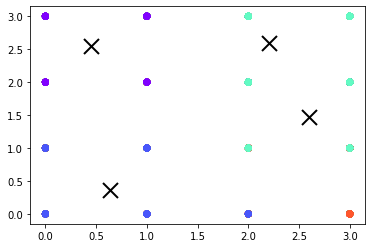

In [162]:
pyplot.scatter(X[:,0], X[:,1], c=model.labels_, cmap='rainbow')

lines= pyplot.plot(centroids[0,0], centroids[0,1],'kx', color='black')
pyplot.setp(lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

lines= pyplot.plot(centroids[1,0], centroids[1,1],'kx', color='black')
pyplot.setp(lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

lines= pyplot.plot(centroids[2,0], centroids[2,1],'kx', color='black')
pyplot.setp(lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

lines= pyplot.plot(centroids[3,0], centroids[3,1],'kx', color='black')
pyplot.setp(lines, ms=15.0)
pyplot.setp(lines, mew=2.0)

pyplot.show()
